In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


Steps:
1. Data preprocessing
2. Train test split
3. Scaled using standard scaler
4. Model sequential > compile
5. Fit 
6. History 


In [20]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [21]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [27]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [30]:
df=pd.get_dummies(df,columns=['Gender','Geography'],drop_first=True,dtype=float)

In [31]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,36,7,0.00,1,0,1,42085.58,1,0.0,0.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1.0,1.0,0.0


In [32]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop(['Exited'],axis=1)
y=df['Exited']

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [41]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
2694,628,29,3,113146.98,2,0,1,124749.08,1.0,1.0,0.0
5140,626,29,4,105767.28,2,0,0,41104.82,0.0,0.0,0.0
2568,612,47,6,130024.87,1,1,1,45750.21,0.0,1.0,0.0
3671,646,52,6,111739.40,2,0,1,68367.18,0.0,1.0,0.0
7427,714,33,8,122017.19,1,0,0,162515.17,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1.0,1.0,0.0
7813,684,63,3,81245.79,1,1,0,69643.31,0.0,1.0,0.0
905,672,45,9,0.00,1,1,1,92027.69,0.0,0.0,0.0
5192,663,39,8,0.00,2,1,1,101168.90,0.0,0.0,0.0


In [43]:
X_train_scaled=scaler.fit_transform(X_train)

In [44]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
9953,550,47,2,0.00,2,1,1,97057.28,1.0,0.0,0.0
3850,680,34,3,143292.95,1,1,0,66526.01,1.0,0.0,0.0
4962,531,42,2,0.00,2,0,1,90537.47,0.0,0.0,0.0
3886,710,34,8,147833.30,2,0,1,1561.58,1.0,1.0,0.0
5437,543,30,6,73481.05,1,1,1,176692.65,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3919,763,39,7,0.00,2,1,0,19458.75,0.0,0.0,1.0
162,800,49,7,108007.36,1,0,0,47125.11,0.0,0.0,0.0
7903,567,34,10,0.00,2,0,1,161571.79,1.0,0.0,1.0
2242,621,30,2,101014.08,2,1,1,165257.31,0.0,1.0,0.0


In [45]:
X_test_scaled=scaler.fit_transform(X_test)

In [46]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [47]:
model= Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [56]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4168
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4194
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4164
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4204
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4252
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4164
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4305
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4235
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4079
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4148


In [59]:
y_pred= model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [60]:
y_pred

array([[0.32459986],
       [0.65004283],
       [0.32459986],
       ...,
       [0.32459986],
       [0.32459986],
       [0.65004283]], dtype=float32)

In [61]:
y_pred = np.where(y_pred>0.5,1,0)

In [75]:
y_test,y_pred

(9953    0
 3850    0
 4962    0
 3886    0
 5437    0
        ..
 3919    0
 162     0
 7903    0
 2242    0
 2745    0
 Name: Exited, Length: 2000, dtype: int64,
 array([[0],
        [1],
        [0],
        ...,
        [0],
        [0],
        [1]]))

In [62]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.511

# Version 2 with Relu

In [65]:
model= Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [77]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8674 - loss: 0.3220 - val_accuracy: 0.8512 - val_loss: 0.3511
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.3154 - val_accuracy: 0.8487 - val_loss: 0.3498
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8655 - loss: 0.3218 - val_accuracy: 0.8525 - val_loss: 0.3516
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8647 - loss: 0.3293 - val_accuracy: 0.8519 - val_loss: 0.3501
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3251 - val_accuracy: 0.8500 - val_loss: 0.3521
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8743 - loss: 0.3195 - val_accuracy: 0.8525 - val_loss: 0.3517
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8661 - loss: 0.3229 - val_accuracy: 0.8525 - val_loss: 0.3503
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8666 - loss: 0.3260 - val_accu

In [78]:
y_pred= model.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

In [80]:
import matplotlib.pyplot as plt

In [84]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

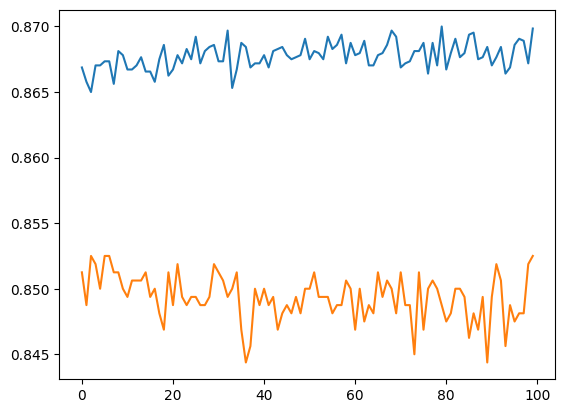

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

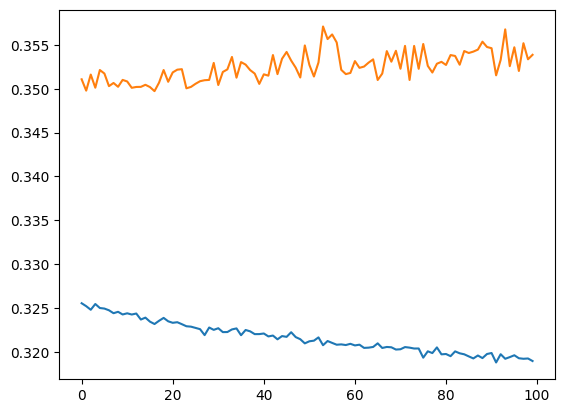

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])